# Ejercicio Práctica 2: optimización para el problema de regresión lineal

En la carpeta **data** encontrarás el fichero **data_linear_regression.npy** el cual contiene (en formato fichero de numpy) la matriz de datos que usaremos en este ejercicio.

Carga dicho fichero y asígnale el nombre **data**. Recuerda, esto se hace en el módulo **numpy** en la forma 

data = np.load(ruta/nombre del fichero)

A continuación, imprime por pantalla dicha matriz y su forma


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
pwd

'/home/ivan/Universidad/2º Curso/Optimizacion 2/Prácticas/github/practicas_optimizacion/Data'

In [18]:
ls

-home-ivan-practicas_optimizacion-Data-.txt  Readme.md


In [20]:
# Completar aquí
data = np.load("/home/ivan/practicas_optimizacion/Data/data_linear_regression.npy")
data
# --------------------


array([[ 4.22137467e-02,  5.82815214e-01,  2.12300528e+01],
       [-1.72428208e-01, -8.77858418e-01, -3.97660505e+01],
       [-5.28171752e-01, -1.07296862e+00, -7.02963331e+01],
       [ 3.19039096e-01, -2.49370375e-01,  1.41809817e+01],
       [ 8.65407629e-01, -2.30153870e+00, -1.25613989e+01],
       [ 1.13376944e+00, -1.09989127e+00,  4.38456953e+01],
       [ 1.62434536e+00, -6.11756414e-01,  9.32631853e+01],
       [-3.22417204e-01, -3.84054355e-01, -3.44784013e+01],
       [ 1.74481176e+00, -7.61206901e-01,  9.65655196e+01],
       [ 1.46210794e+00, -2.06014071e+00,  3.59720885e+01]])

In [21]:
data.shape

(10, 3)

Como puedes observar, **data** es una matriz de $10$ filas y $3$ columnas.

Las dos primeras columnas son de **features** y la última es de **labels**. Cada fila es una **instance** (muestra)

Vamos a utilizar las $8$ primeras filas para entrenar nuestro modelo de regresión lineal y las dos últimas filas para testear la bondad del modelo. Por tanto, usando la técnica de **slicing** que estudiaste en Álgebra Lineal, construye una matriz **X_train** que contenga las $8$ primeras filas y las $2$ primeras columnas de **data** y luego una matriz **y_train** que contenga los datos de las $8$ primeras filas y última columna de **data**.

De igual modo, construye **X_test** e **y_test** con los datos restantes. Imprime todo por pantalla para asegurarte que has seleccionado bien los datos.

In [45]:
# Completar aquí
X_train = data[:8, :2]
y_train = data[:8, 2:]
# --------------------


In [47]:
print("X_train:\n", X_train)
print("\ny_train:\n", y_train)

X_train:
 [[ 0.04221375  0.58281521]
 [-0.17242821 -0.87785842]
 [-0.52817175 -1.07296862]
 [ 0.3190391  -0.24937038]
 [ 0.86540763 -2.3015387 ]
 [ 1.13376944 -1.09989127]
 [ 1.62434536 -0.61175641]
 [-0.3224172  -0.38405435]]

y_train:
 [[ 21.23005281]
 [-39.76605048]
 [-70.29633308]
 [ 14.18098172]
 [-12.56139894]
 [ 43.84569533]
 [ 93.26318528]
 [-34.47840128]]


In [49]:
X_test = data[8:, :2]
y_test = data[8:, 2:]


In [50]:
print("X_test:\n", X_test)
print("\ny_test:\n", y_test)

X_test:
 [[ 1.74481176 -0.7612069 ]
 [ 1.46210794 -2.06014071]]

y_test:
 [[96.56551964]
 [35.9720885 ]]


Resuelve de forma directa el problema de regresión lineal

$$
\text{Minimizar en } \theta : \quad 	MSE (\theta) = \frac{1}{8}\sum_{i=1}^{8}\left(\theta^T x^{(i)} - y^{(i)}\right)^2.
$$

donde $x^{(i)}$ es la fila i-ésima de $X$ e $y^{(i)}$ la componente i-ésima del vector de labels.

Recuerda añadir la columna de unos para el bias.


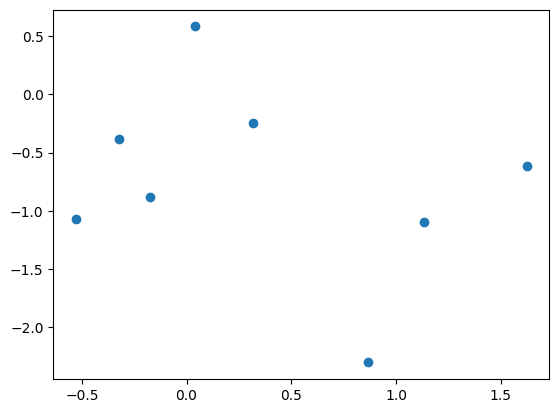

In [69]:
plt.scatter(X_train[:, :1], X_train[:, 1:2])

In [72]:
regr_model = LinearRegression()
regr_model.fit(X_train, y_train)
regr_model.coef_


array([[69.27584124, 31.48194947]])

In [3]:
# Completar aquí

# --------------------


Resuelve el mismo problema con el método [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [4]:
# Completar aquí

# --------------------


Define una función que nos de como salida el modelo de predicción de regresión lineal para el $\theta_{\text{best}}$ que has calculado previamente.

In [5]:
# Completar aquí

# --------------------


Evalua el modelo de predicción en los dos datos X_test y llama $y_1$, $y_2$ a los resultados obtenidos. Finalmente, compara los resultados con los datos y_test imprimiendo por pantalla:

a) y_1

b) y_test[0]

c) y_2

d) y_test[1]

e) error de generalización = $\frac{1}{2}\left[\left( y_1-y_{\text{test}}[0]\right)^2 + \left( y_2-y_{\text{test}}[1]\right)^2\right]$



In [6]:
# Completar aquí

# --------------------
